In [1]:
# Análisis y manejo de datos
import pandas as pd
import numpy as np

# Yfinance
import yfinance as yf

# Tipos de datos relacionados al tiempo
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

# FMP API
from pyfmpcloud import settings
from pyfmpcloud import company_valuation as cv
api_key = pd.read_csv("Data/apiKey_FMP.csv").iloc[0, 0]
settings.set_apikey(api_key)

# Filtrado de alertas
import warnings
warnings.filterwarnings("ignore")

In [2]:
sp500_companies = pd.DataFrame(pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0])
financialSector = list(sp500_companies[sp500_companies["GICS Sector"] == "Financials"]["Symbol"])

## Margen de Beneficio Neto

In [3]:
f = lambda df : list(df["netIncome"] / df["revenue"])
netProfitMargins = np.concatenate(list(map(lambda ticker : f(cv.income_statement(ticker)[["revenue", "netIncome"]]), 
                                           financialSector)))

netProfitMargins = netProfitMargins[(netProfitMargins != float("inf")) & (netProfitMargins != float("-inf")) & 
                                    (netProfitMargins <= 1) & (netProfitMargins >= -1)]

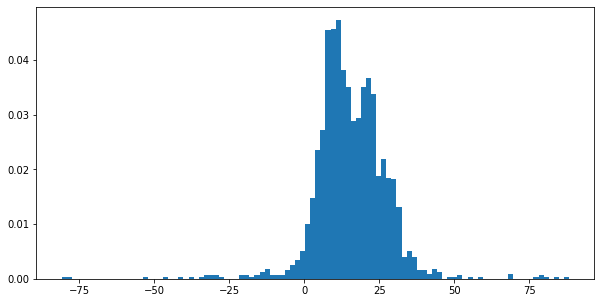

In [4]:
plt.figure(figsize = (10, 5))
plt.hist(netProfitMargins * 100, bins = 100, density = True);

## Ratio Payout

In [5]:
f = lambda df : list(abs(df["dividendsPaid"]) / df["netIncome"])
payoutRatios = np.concatenate(list(map(lambda ticker : f(cv.cash_flow_statement(ticker)[["netIncome", "dividendsPaid"]]), 
                                           financialSector)))

payoutRatios = payoutRatios[(payoutRatios != float("inf")) & (payoutRatios != float("-inf")) 
                            & (payoutRatios >= 0) & (payoutRatios <= 1)]

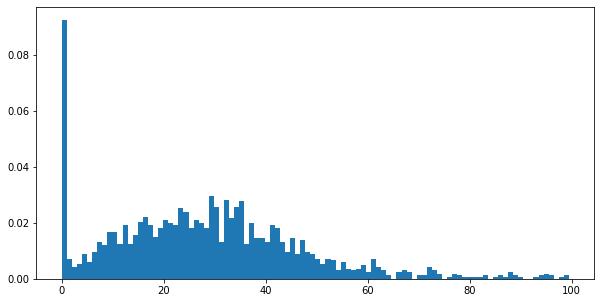

In [6]:
plt.figure(figsize = (10, 5))
plt.hist(payoutRatios * 100, bins = 100, density = True);

## Precio a Dividendos

## Beta

In [7]:
def f(ticker, start, end):
    try:
        precios = pd.DataFrame()
        precios[ticker] = yf.download(ticker, start = start, end = end,  progress = False)["Adj Close"]
        precios["^GSPC"] = yf.download("^GSPC", start = start, end = end,  progress = False)["Adj Close"]

        matrizCov = precios.dropna().pct_change().dropna().cov()
        beta = matrizCov.iloc[0, 1] / matrizCov.iloc[1, 1]
        
    except:
        pass
    
    return beta

In [8]:
fechas = [("2016-01-01", "2018-12-31"),("2017-01-01", "2018-12-31"),
          ("2018-01-01", "2018-12-31"), ("2019-01-01", "2019-12-31"), 
          ("2020-01-01", "2020-12-31"), ("2021-01-01", "2021-10-01")]

betas = list(map(lambda fecha : list(map(lambda ticker : f(ticker, fecha[0], fecha[1]), financialSector)), fechas))


1 Failed download:
- BRK.B: No data found, symbol may be delisted

1 Failed download:
- BRK.B: No data found, symbol may be delisted

1 Failed download:
- BRK.B: No data found, symbol may be delisted

1 Failed download:
- BRK.B: No data found, symbol may be delisted


In [34]:
betasDf = pd.DataFrame(np.concatenate(betas)).dropna()
betasSectorFin = list(map(lambda i : float(x.iloc[i]), range(len(betasDf))))
betasSectorFin

AttributeError: 'list' object has no attribute 'iloc'

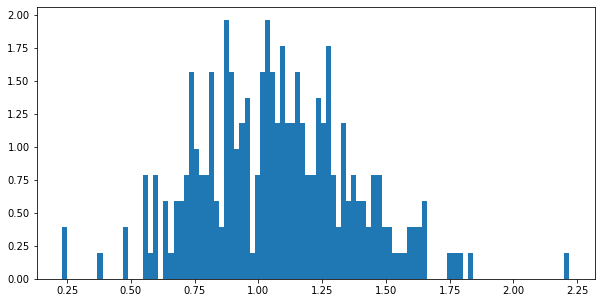

In [49]:
plt.figure(figsize = (10, 5))
plt.hist(x, bins = 100, density = True);